In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
data = pd.read_csv(r'C:\Users\ACER\Desktop\Sparks\globalterrorismdb_0718dist.csv',encoding='latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
# returns an array of column names and used to extract the names of the features or independent variables from the dataset.
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
#select specific columns and rename
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

#data is being filtered to include only specific columns.
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [5]:
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [6]:
data.isnull()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
181687,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
181688,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
181689,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [7]:
data.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [8]:
#filling the null
data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)

In [9]:
#data['Casualities'] = data['kill'] + data['Wound']
data['Affected'] = data['kill'] + data['Wound']

In [10]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   latitude    177135 non-null  float64
 8   longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  kill        181691 non-null  float64
 11  Wound       181691 non-null  float64
 12  target1     181055 non-null  object 
 13  summary     115562 non-null  object 
 14  Group       181691 non-null  object 
 15  Targettype  181691 non-null  object 
 16  Weapon      181691 non-null  object 
 17  motive      50561 non-null   object 
 18  Affected    181691 non-null  float64
dtypes:

,Year,Month,day,latitude,longitude,kill,Wound,Affected
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


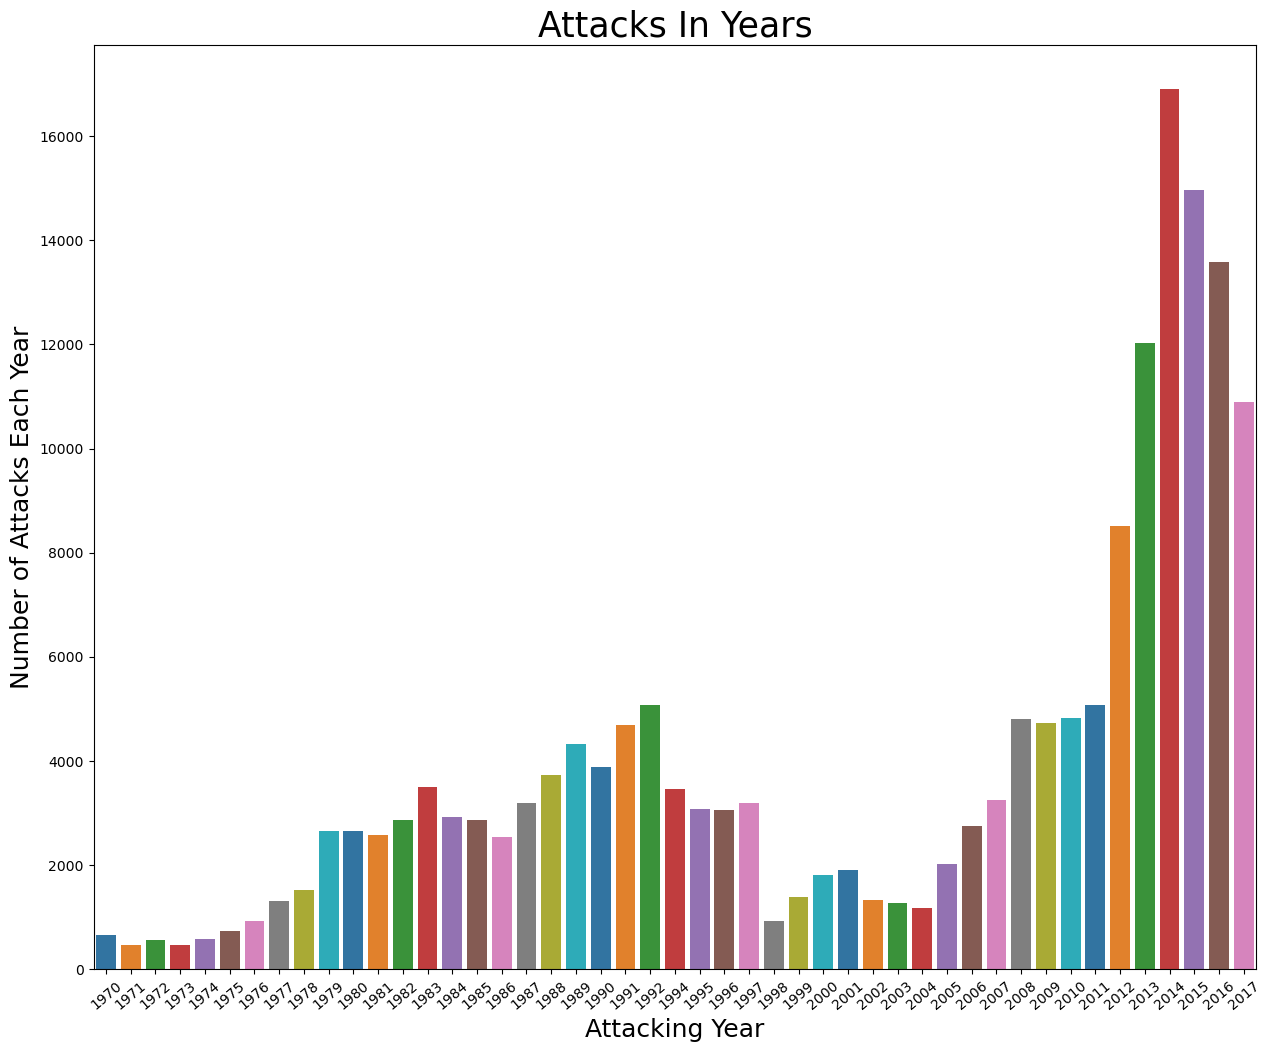

In [11]:
#terrorist attacks in year

year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (15,12))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 40)
plt.xlabel('Attacking Year',fontsize=18)
plt.ylabel('Number of Attacks Each Year',fontsize=18)
plt.title('Attacks In Years',fontsize=25)
plt.show()

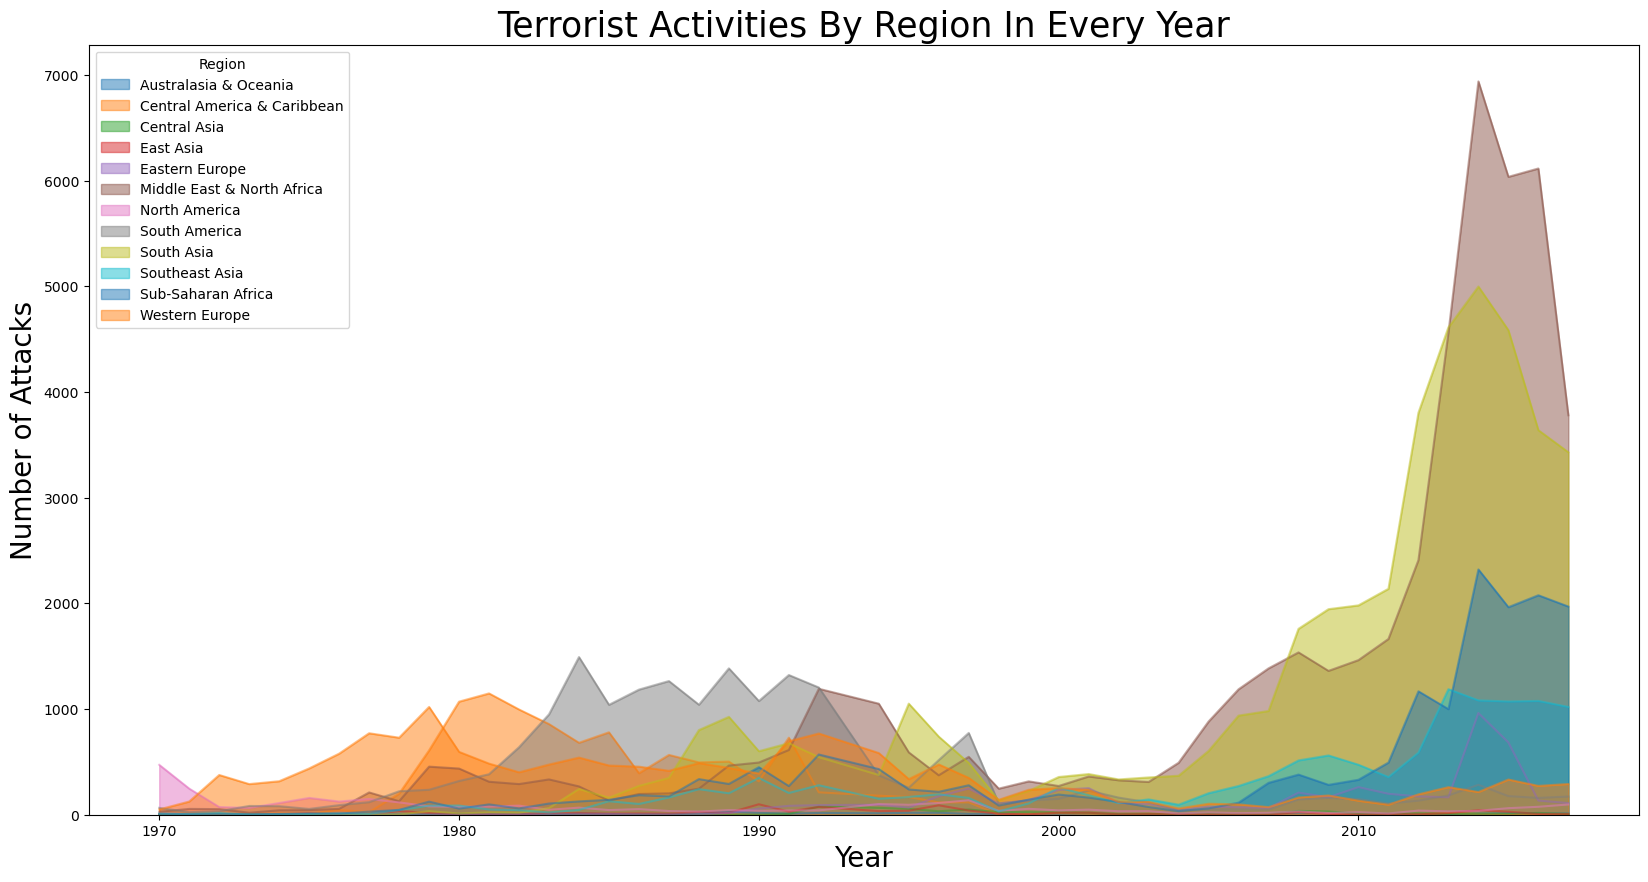

In [12]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Every Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

In [13]:
attack = data.Country.value_counts()[:10]
#elects only the first 10 rows of the resulting frequency distribution, which correspond to the top 10 countries with the highest number of attacks.
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [14]:
data.Group.value_counts()[1:10]
#selects the second through tenth rows of the resulting frequency distribution, which correspond to the top 9 terrorist groups with the highest number of attacks.

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

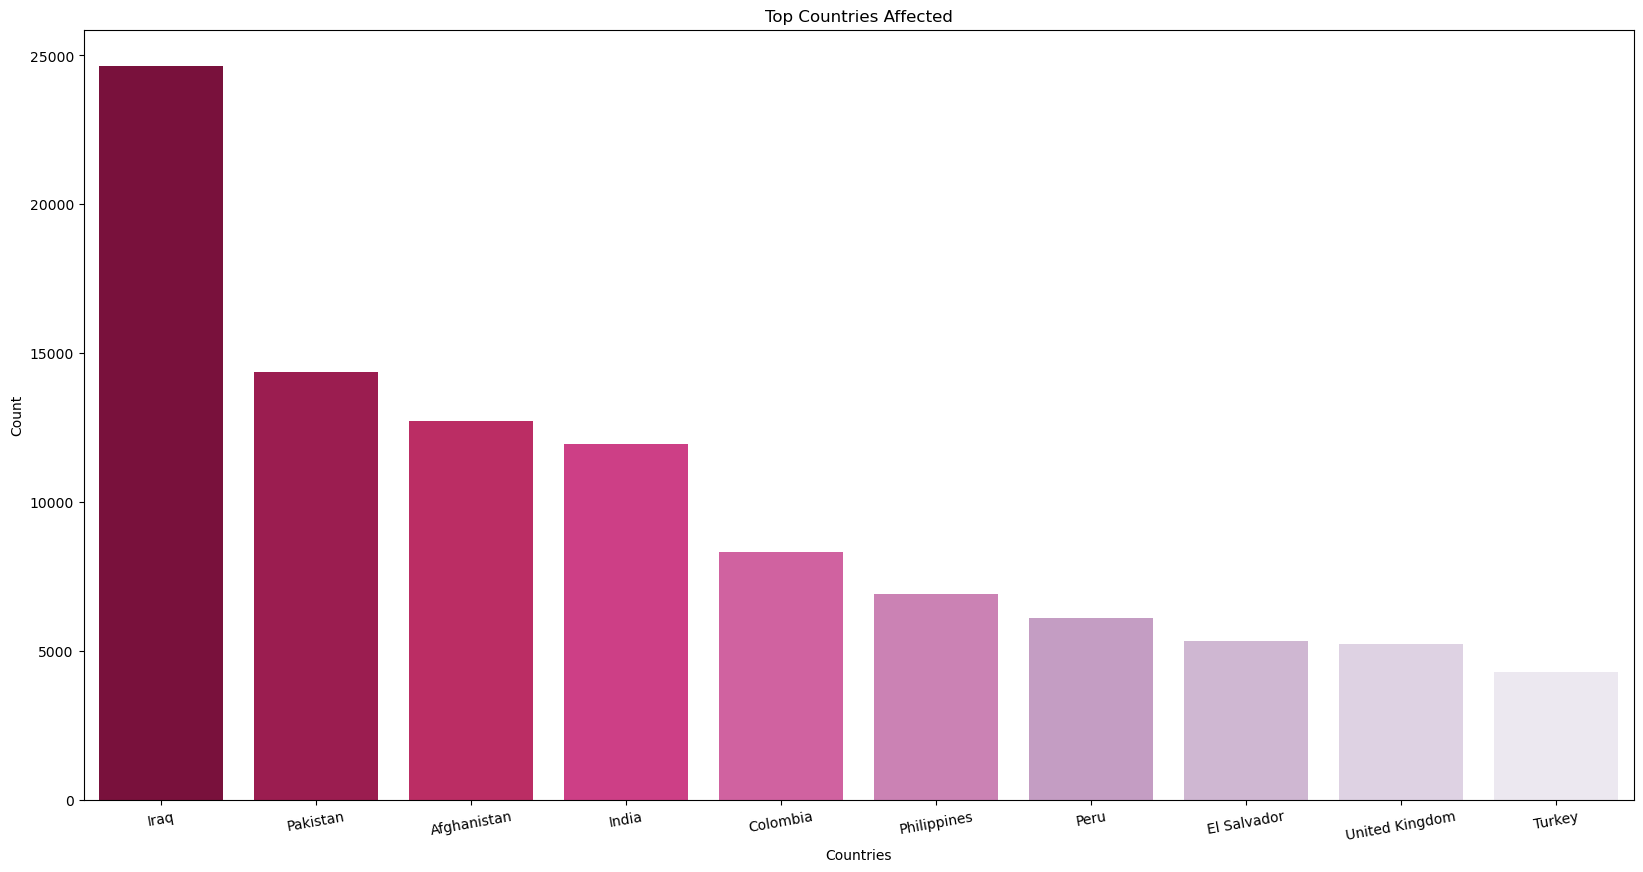

In [15]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette='PuRd_r')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation =10)
plt.show()

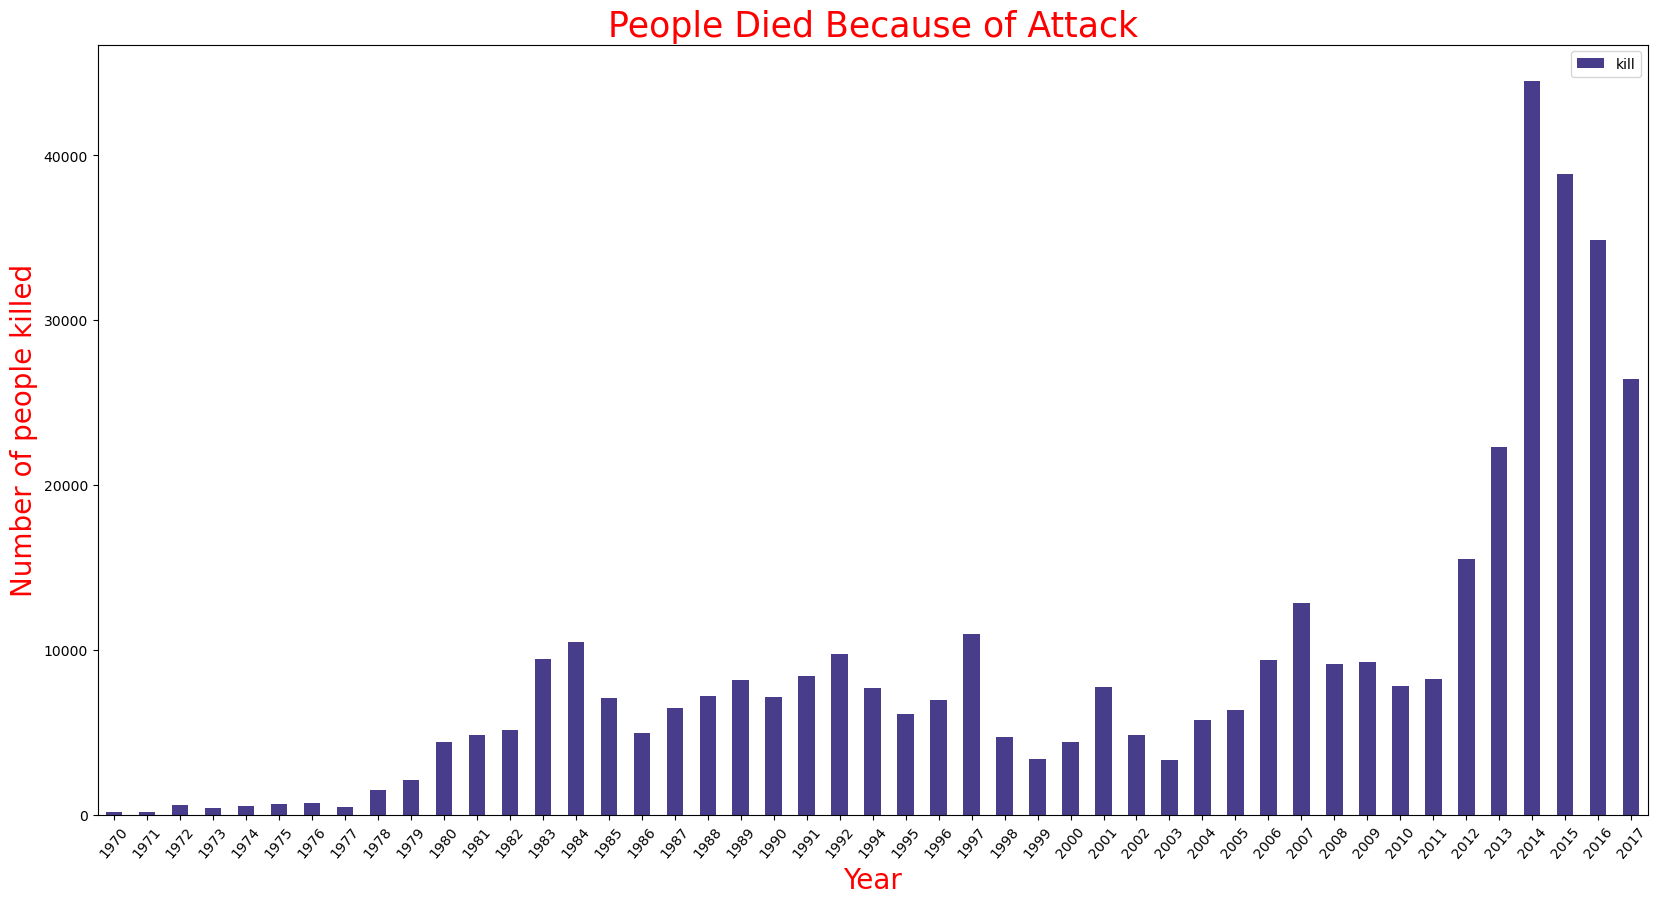

In [16]:
data[['Year','kill']].groupby(["Year"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkslateblue'])
plt.xticks(rotation=50)
plt.title("People Died Because of Attack",fontsize=25, color='red')
plt.ylabel("Number of people killed",fontsize=20,color= 'red')
plt.xlabel('Year',fontsize=20, color= 'red')
plt.show()

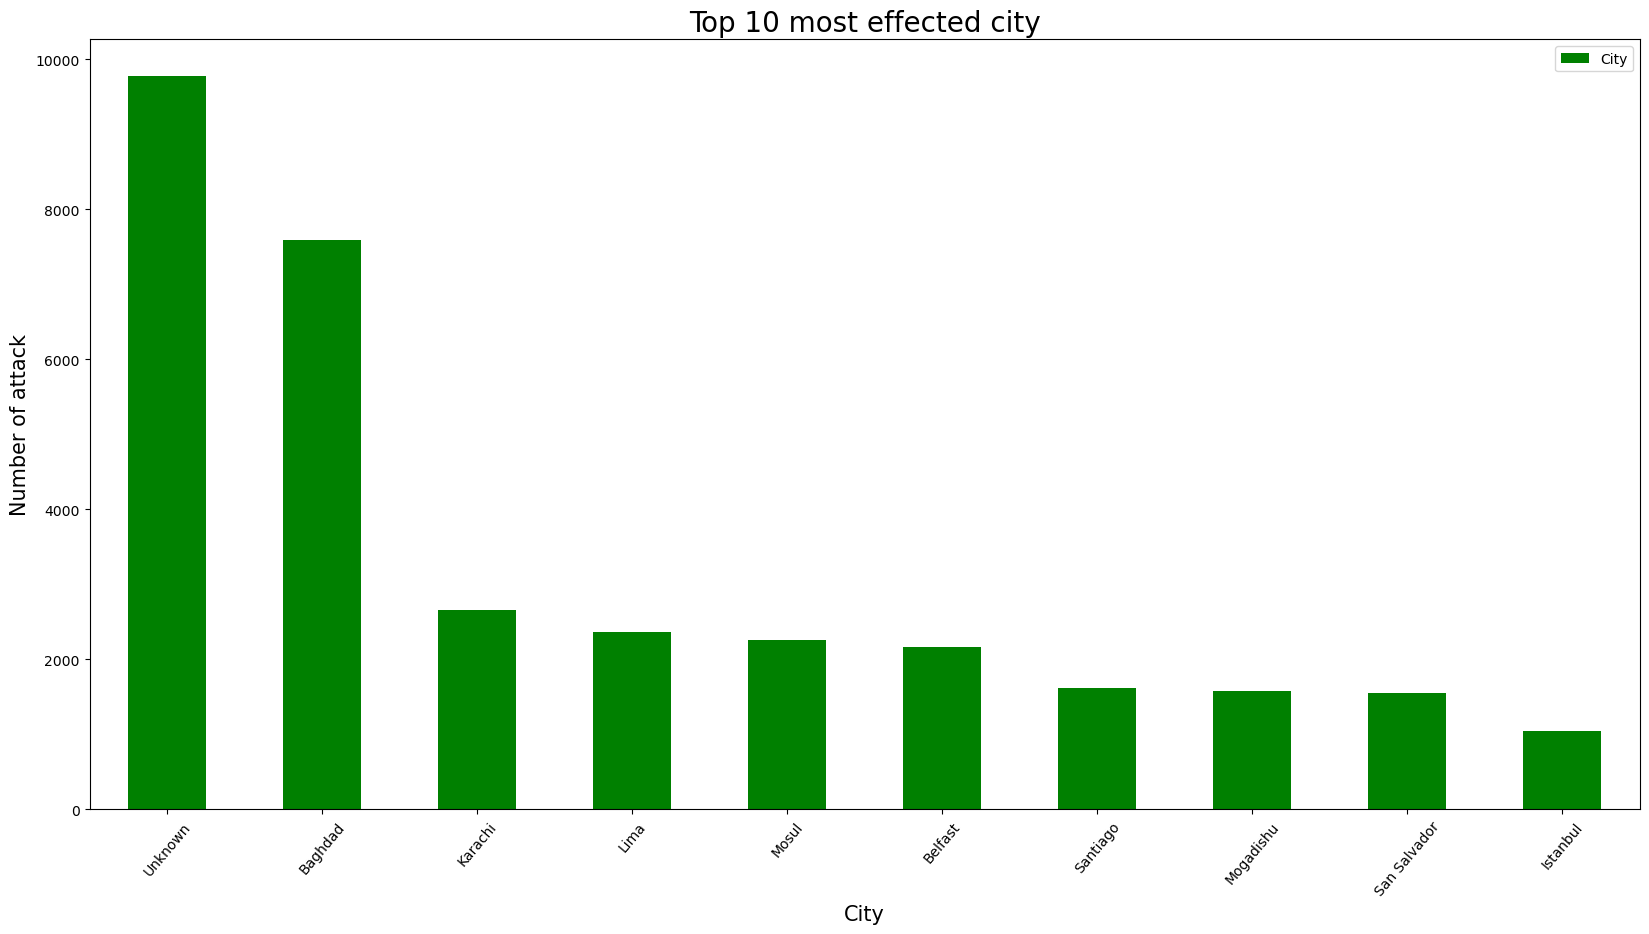

In [17]:
##data['City'].value_counts() - This line counts the number of occurrences of each unique value in the 'City' column of the 'data' dataframe.
#to_frame() - This converts the resulting Series object into a DataFrame.
#sort_values('City',axis=0,ascending=False) - This sorts the DataFrame in descending order based on the values in the 'City' column.
#.head(10) - This selects the top 10 rows from the sorted DataFrame.
#.plot(kind='bar',figsize=(20,10),color='green') - This plots a bar graph with a green color scheme, using a figure size of 20x10 inches.

data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='green')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

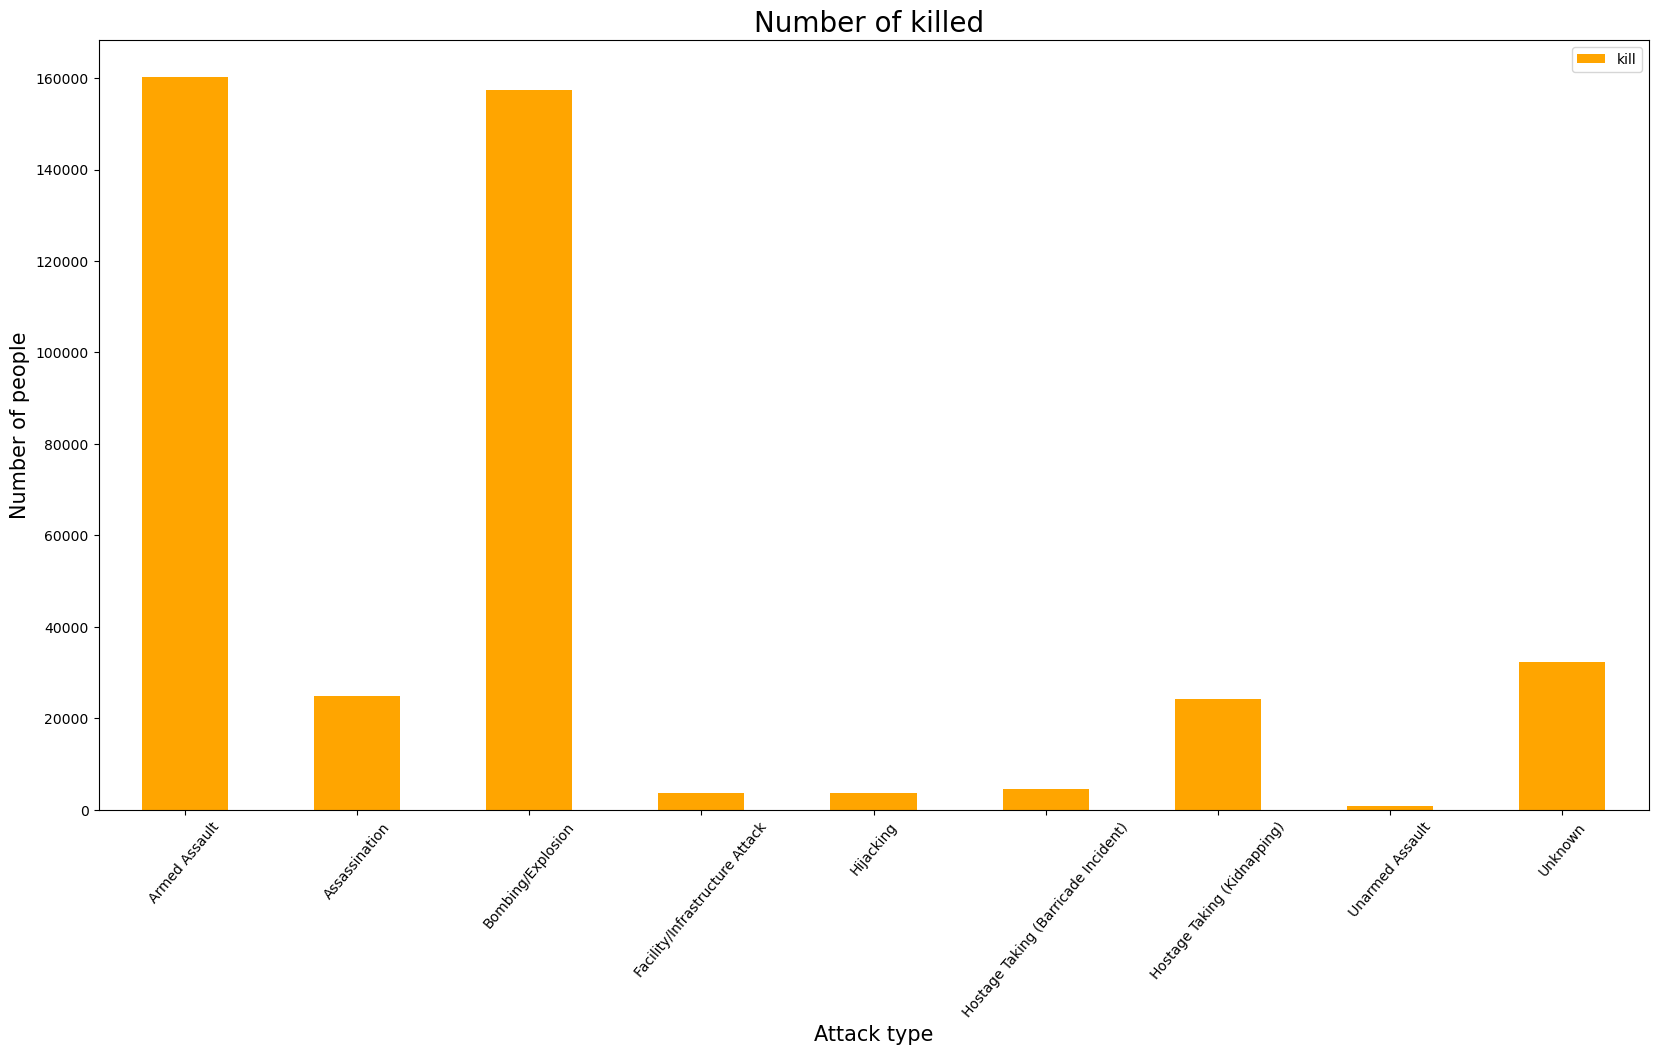

In [18]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['orange'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

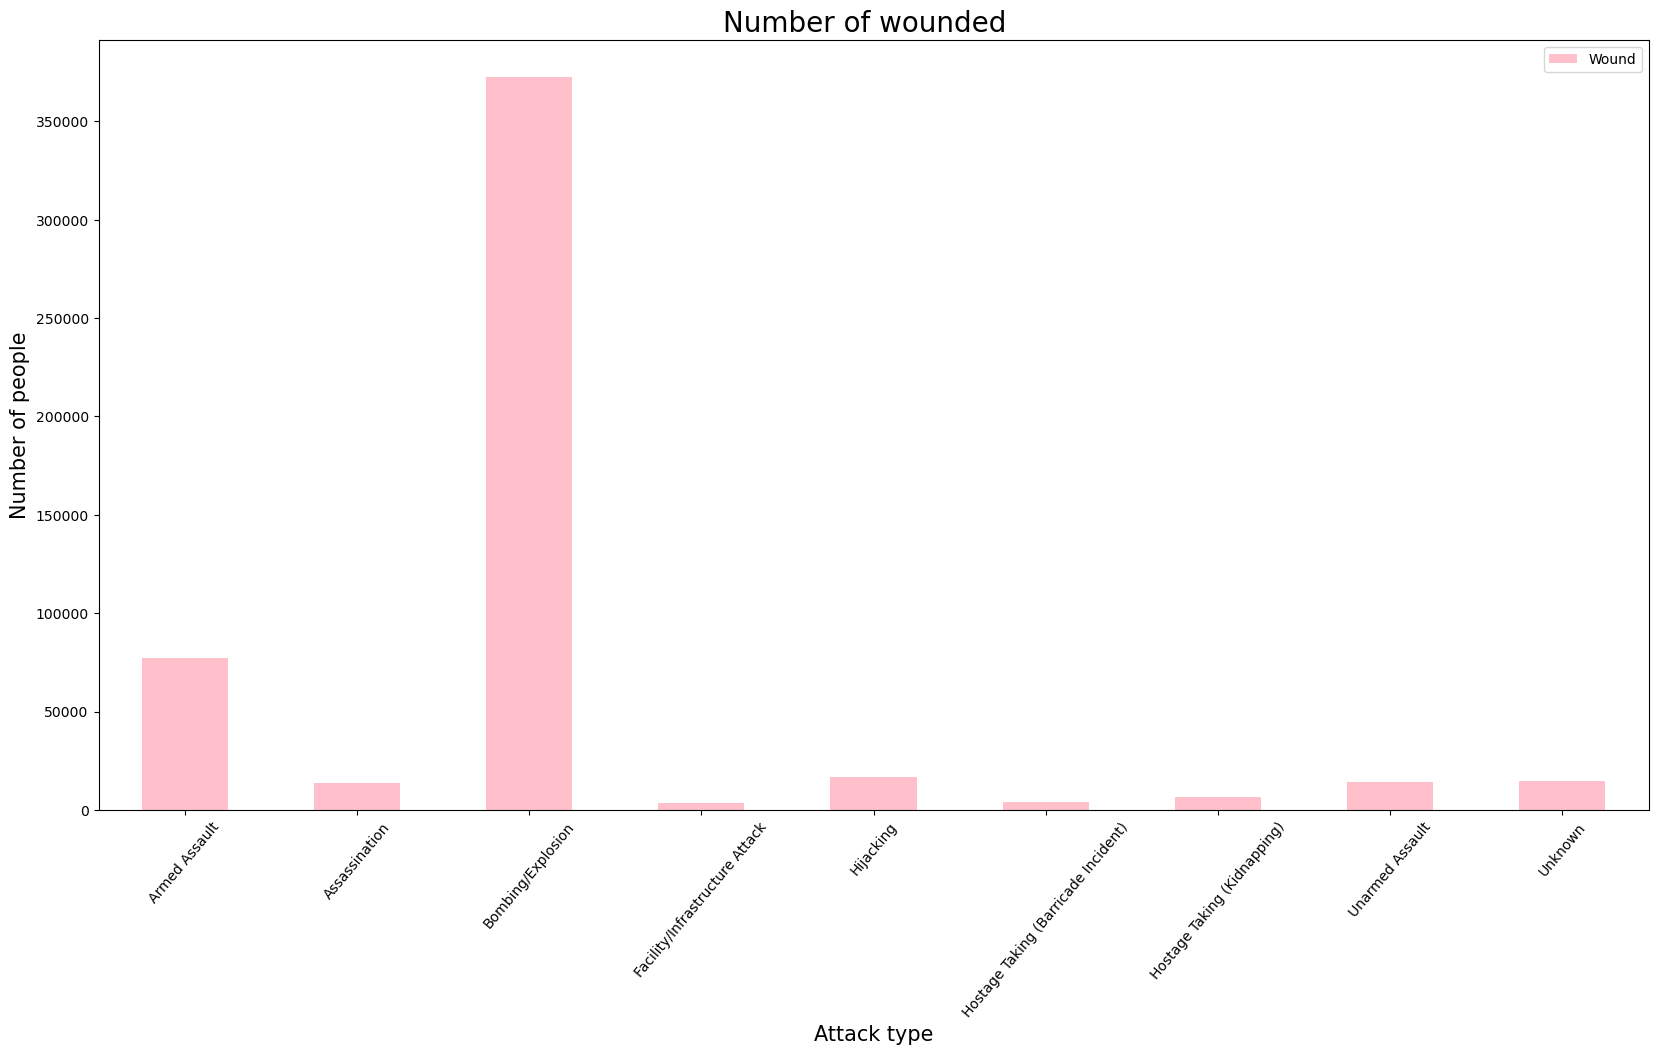

In [19]:
data[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['pink'])
plt.xticks(rotation=50)
plt.title("Number of wounded  ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

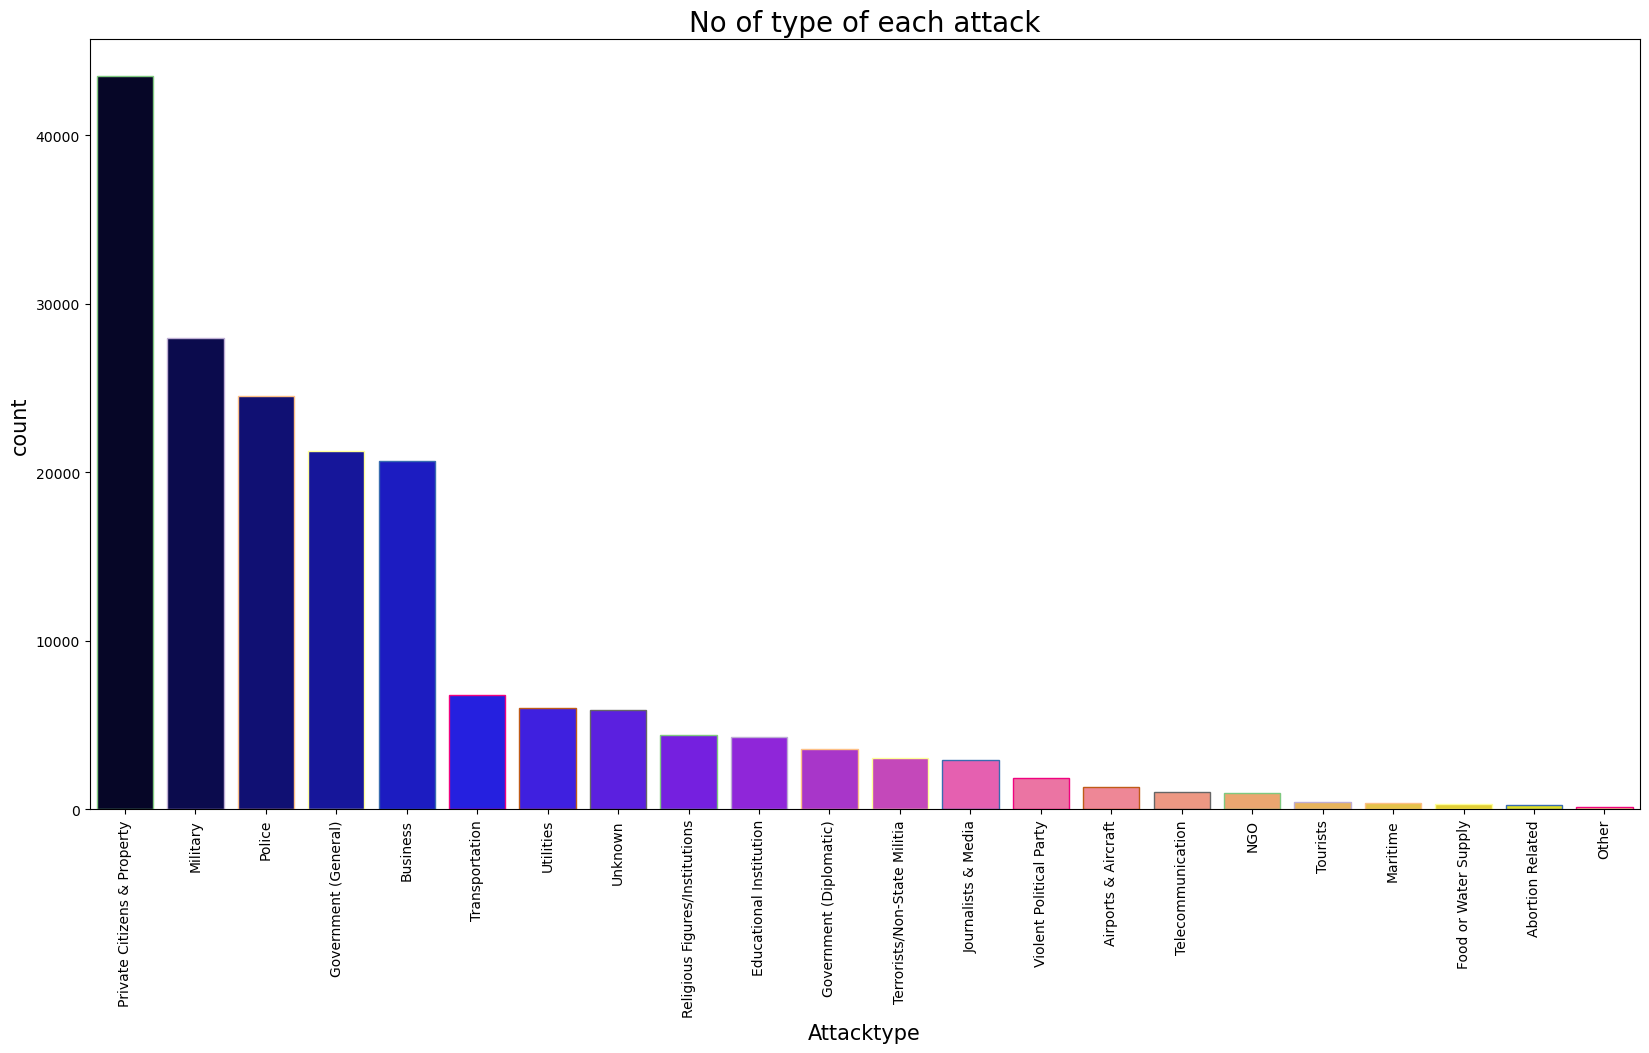

In [20]:
plt.subplots(figsize=(20,10))
sns.countplot(data["Targettype"],order=data['Targettype'].value_counts().index,palette="gnuplot2",edgecolor=sns.color_palette("Accent"));
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("No of type of each attack",fontsize=20)
plt.show()

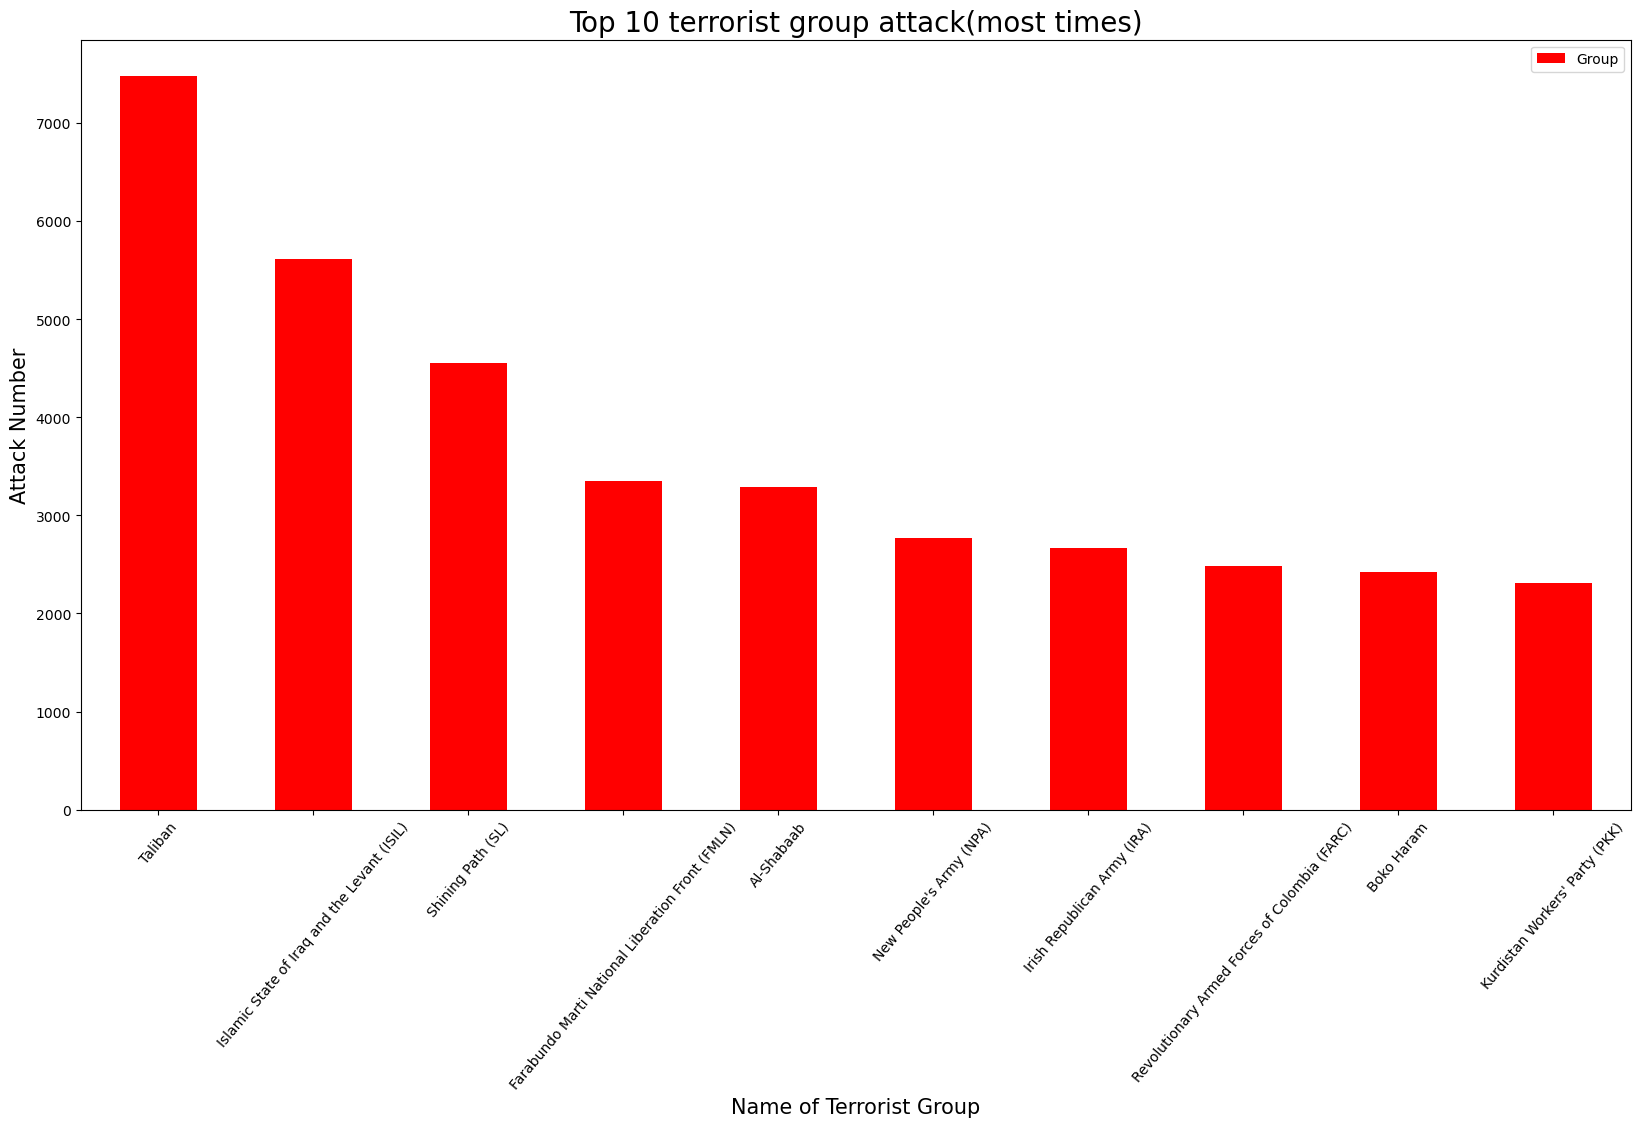

In [21]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='red',figsize=(20,10))
plt.xticks(rotation=50)#used to curve the label of x
plt.title("Top 10 terrorist group attack(most times)",fontsize=20)
plt.xlabel("Name of Terrorist Group",fontsize=15)
plt.ylabel("Attack Number",fontsize=15)
plt.show()

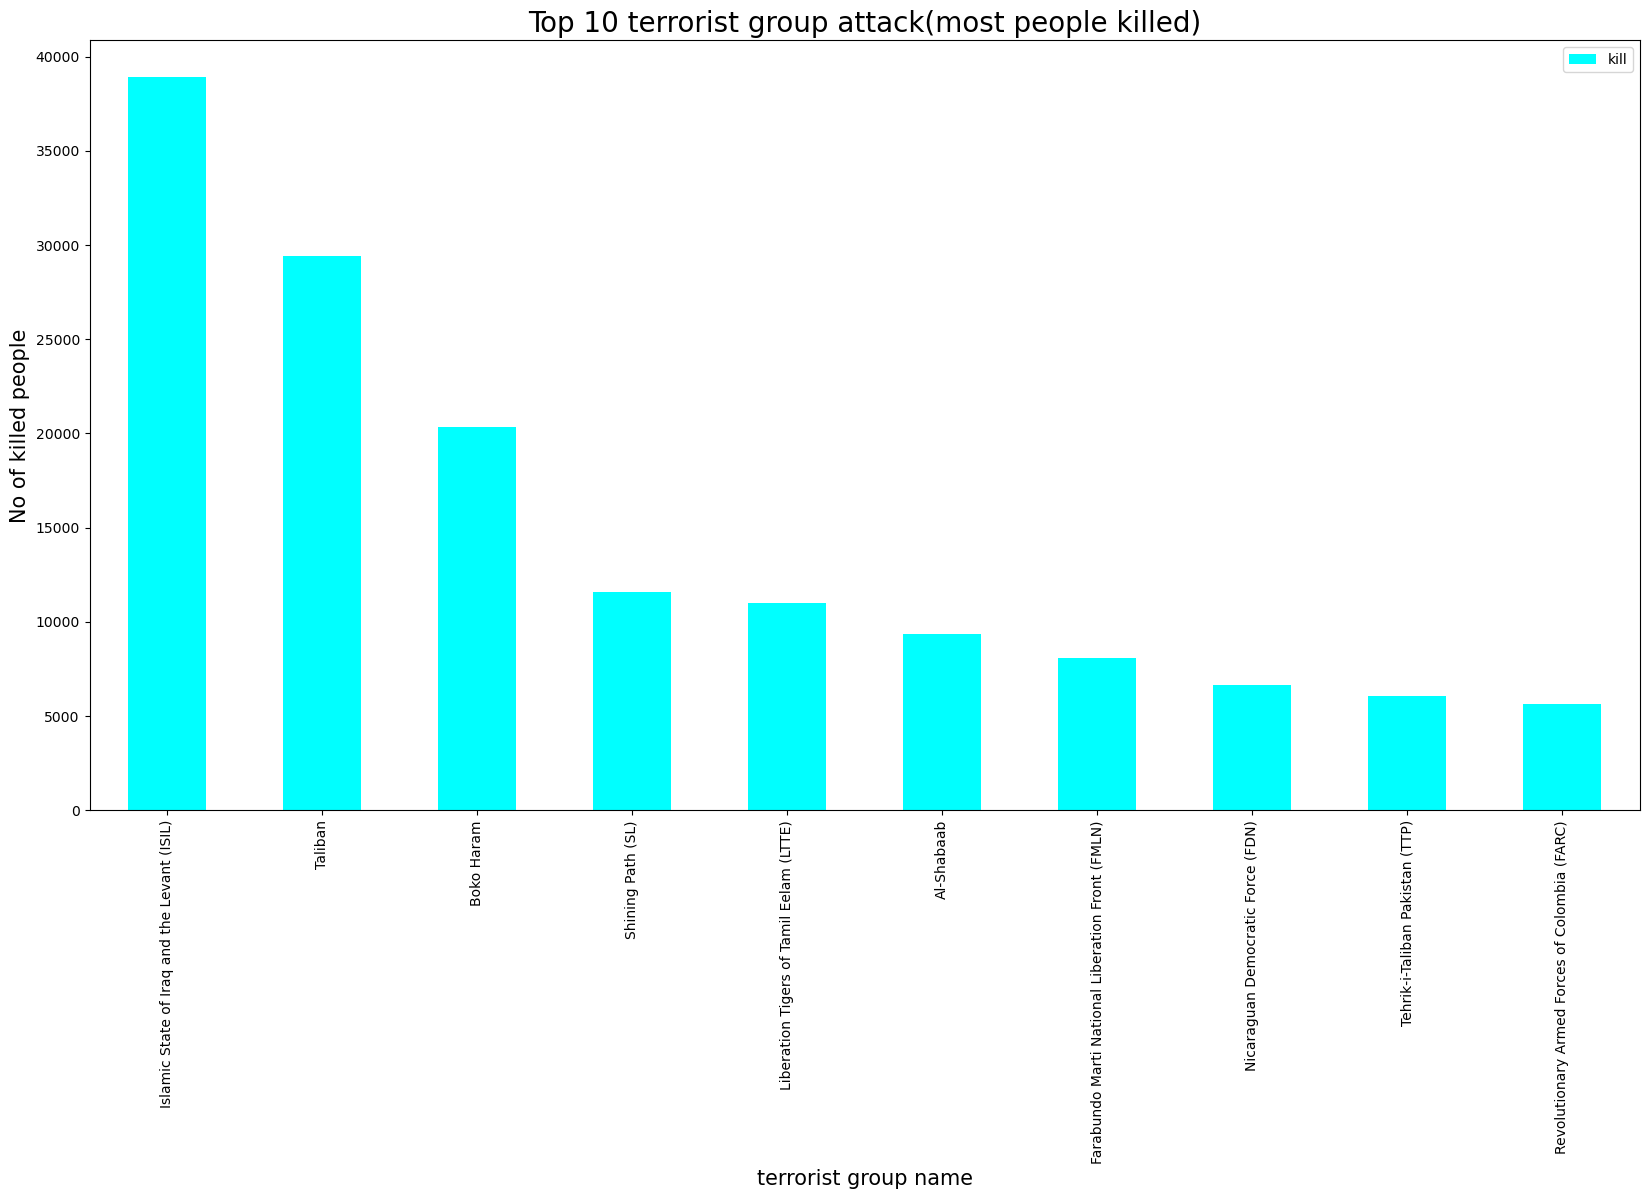

In [22]:
data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='cyan',figsize=(20,10))
plt.title("Top 10 terrorist group attack(most people killed)",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()

In [23]:
# country with most killed people
df=data[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [24]:
#The code data.loc[:, 'kill'] uses the .loc indexer to select a column named "kill" from the data object. The : before the comma specifies that all rows of the DataFrame should be selected, while 'kill' after the comma specifies the column label to select.
kill = data.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 411868


In [25]:
#columns='Attacktype': This specifies that the pivot table should have columns corresponding to the "Attacktype" variable in the dataset.
#values='kill': This specifies that the values to aggregate in the pivot table should be the "kill" variable from the dataset.
#aggfunc='sum': This specifies that the aggregation function used to summarize the "kill" values should be the sum.
totalKill = data.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
totalKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [26]:
countryKill = data.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


In [27]:

cityKill = data.pivot_table(columns='City', values='kill', aggfunc='sum')
cityKill

City,62 miles South of Dushanbe,A Coruna district,A'arbaniyeh,ANkara,Aab Kamra,Aabde,Aabdeh,Aabgarmak,Aachen,Aadaisse,...,uri,valledupar,valparaiso,vilcashuaman,villavicencio,vinchos,wakunai,yacan,yokohama,zinarag
kill,3.0,3.0,3.0,0.0,4.0,2.0,1.0,1.0,1.0,0.0,...,3.0,9.0,0.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0


In [29]:
Region = data.pivot_table(columns='Region', values='kill', aggfunc='sum')
Region

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
kill,150.0,28708.0,1000.0,1152.0,7415.0,137642.0,4916.0,28849.0,101319.0,15637.0,78386.0,6694.0


In [30]:
Month = data.pivot_table(columns='Month', values='kill', aggfunc='sum')
Month

Month,0,1,2,3,4,5,6,7,8,9,10,11,12
kill,3.0,31320.0,30565.0,31479.0,34672.0,37310.0,38047.0,38558.0,38225.0,34485.0,35174.0,31054.0,30976.0


In [31]:
Group= data.pivot_table(columns='Group', values='kill', aggfunc='sum')
Group

Group,1-May,11-Sep,14 K Triad,14 March Coalition,14th of December Command,15-May,15th of September Liberation Legion,16 January Organization for the Liberation of Tripoli,1920 Revolution Brigades,19th of July Christian Resistance Brigade,...,Zimbabwe People's Army (ZIPA),Zintani Militia,Zionist Resistance Fighters,Zomi Revolutionary Army (ZRA),Zulu Militants,Zulu Miners,Zuwar al-Imam Rida,Zviadists,Zwai Tribe,leftist guerrillas-Bolivarian militia
kill,2.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,15.0,1.0,...,0.0,0.0,1.0,0.0,21.0,1.0,0.0,0.0,5.0,0.0


In [33]:
Attacktype= data.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
Attacktype

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [ ]:
#Country with the most attacks: Iraq

#City with the most attacks: Baghdad

#Region with the most attacks: Middle East & North Africa

#Year with the most attacks: 2014

#Month with the most attacks: 5

#Group with the most attacks: Taliban

#Most Attack Types: Bombing/Explosion